In [2]:
import fsps
import numpy as np
import pandas as pd
import astropy.cosmology as cos
from astropy.cosmology import FlatLambdaCDM
import unyt as u
import pickle
import matplotlib.pyplot as plt

In [5]:
def read_cloudy_in(file):
    df = pd.read_csv(file,
                     header = None,
                    skiprows = 5,
                    skipfooter = 3,
                    delim_whitespace = True)
    
    df = df.drop(columns = 0)
    
    for i in range(len(df[1])):
        df[1][i] = float(df[1][i].replace(")","").replace("(",""))
        df[2][i] = float(df[2][i].replace(")","").replace("(",""))
    
    return df

In [6]:
with open("spec_dat.pickle",'rb') as b:
        dat = pickle.load(b)

dat[20].keys()

dict_keys([1.259, 1.37, 1.487, 1.609, 1.737, 1.871, 2.013, 2.16, 2.316, 2.479, 2.649])

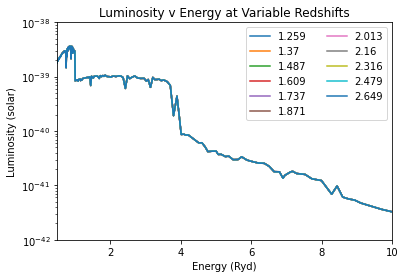

In [7]:
for rs in dat[20].keys():
    
    spec = dat[20][rs]['spec']
    wave = dat[20][rs]['wave'] 
    
    d_cm = 20*3.086e+21
    spec = spec/(16*np.pi**2*d_cm**2) 

    lum = spec*(3e8/(wave*1e-10))

    Ryd = 2.1798723611035e-18 * u.J
    nwave = wave * u.Angstrom
    nu = nwave.to("J", equivalence="spectral") / Ryd
    nu = nu.to_value()
    
    plt.plot(nu,lum,label = rs)
    
# plt.xscale('log')
plt.xlim(0.5,10)
plt.yscale('log')
plt.ylim(10**(-42),10**(-38))
plt.xlabel("Energy (Ryd)")
plt.ylabel("Luminosity (solar)")
plt.title("Luminosity v Energy at Variable Redshifts")
plt.legend(ncol = 2)

In [8]:
om = pd.read_csv("/mnt/home/tairaeli/astro_libs/PyCEE/omega_dat.csv")
met = om["metal"]
np.min(met)

0.0

In [9]:
put_dat = read_cloudy_in("/mnt/home/tairaeli/astro_libs/cloudy_cooling_tools/examples/grackle/P19_UVB/z_2.6490e+00.out")
kpc20 = read_cloudy_in("/mnt/gs21/scratch/tairaeli/20_kpc_dat/z_2.6490e+00.out")


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [30]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'

ptw_rs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)

ptw_wave = ptw_data[:,0]

rs_range = [1.2,2.7]
rs_mask0 = np.where((ptw_rs>=rs_range[0]) & (ptw_rs<=rs_range[1]))

ptw_rs = ptw_rs[rs_mask0]
ptw_data = ptw_data[:,rs_mask0]

def rebin(Egal,erg,uvb_spec):
    
    # initializing array to store new luminosities
    nerg = np.zeros(len(nu))*u.erg/u.cm**2
    
    erg = np.flip(erg)
    
    # compare wave data from FSPS to desired wave binning to rebin spec data
    iuvb = 0
    for i in range(wave.size):
        
        # accounting for indexing issues in first bin
        if Egal[i]<nu[0]:
            nerg[iuvb] += erg[i]
        else:
            if iuvb <= len(nerg)-2:
                if nu[iuvb+1] <= Egal[i]:
                    iuvb += 1
            
                dist = nu[iuvb+1] - nu[iuvb]
                E_dist = Egal[i] - nu[iuvb]
                norm_E_dist = E_dist/dist
                nerg[iuvb] += erg[i]*(1-norm_E_dist)
                nerg[iuvb+1] += erg[i]*norm_E_dist
            else:
                nerg[iuvb] += erg[i]
    print(f"min nerg at {d} is {np.min(nerg)}")
    # adding the Putwein et.al. intensities to the intensity from FSPS
    nerg += uvb_spec
#     print(uvb_spec[minmask])
    return nerg

def round_arr(arr):
    iout = []
    for i in range(len(arr)):
        iout.append(float(f"{arr[i]:.10f}"))
    return np.asarray(iout)

In [31]:
ptw_rs[10]

2.649

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/home/tairaeli/.local/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


min nerg at 20 is -inf erg/cm**2


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/home/tairaeli/.local/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


min nerg at 50 is -inf erg/cm**2


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/home/tairaeli/.local/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


min nerg at 100 is -inf erg/cm**2


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/home/tairaeli/.local/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


min nerg at 150 is -inf erg/cm**2
min nerg at 200 is -inf erg/cm**2


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/home/tairaeli/.local/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


(0.5, 10)

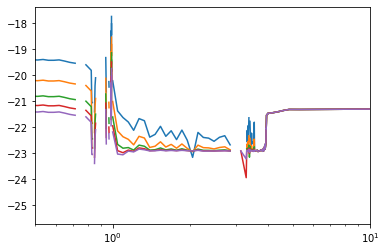

In [38]:
wave = dat[20][2.649]['wave']
wav = ptw_wave*u.Angstrom
Ryd = 2.1798723611035e-18 * u.J

gal_wave = wave*u.Angstrom

nu_gal = gal_wave.to("J", equivalence="spectral") / Ryd
nu_gal = np.flip(nu_gal.to_value())

dlis = [20,50,100,150,200]
speclis = []
ptw_spec = ptw_data[:,0,-1]

nu = wav.to("J", equivalence= "spectral") / Ryd
nu = np.flip(nu.to_value())

# setting RS
rs = 2.649

#index of rs in uvb data
irs = 10

for d in dlis:
    
    wave = dat[d][rs]["wave"]
    spec = dat[d][rs]["spec"]

    gal_wave = wave*u.Angstrom

    nu_gal = gal_wave.to("J", equivalence="spectral") / Ryd
    nu_gal = np.flip(nu_gal.to_value())

    # adding units to spectral data
    spec = spec*u.lsun/u.Hz
    # converting distance from galactic center into centimeters
    d_cm = (d*u.kpc).to("cm")

    # converting FSPS spectra to units of erg/cm^2
    erg = spec.to("erg")/((4*np.pi)**2*d_cm**2)

    # calling the uvb intensity data for the current redshift
    uvb_spec = ptw_data[:,0,irs]*u.erg/u.cm**2

    # rebining data to match desired Cloudy input
    spec = rebin(nu_gal,erg,uvb_spec)
                                        
    plt.plot(nu,np.log10(spec))
#     plt.plot(nu,np.flip(ptw_spec))
# plt.yscale("log")
plt.xscale("log")
plt.xlim(0.5,10)
# plt.ylim(1e-27,1e-18)

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [28]:
iout = []

for i in range(len(dat[20][2.649]['rebin_spec'])):
#     iout.append(float(f"{dat[20][2.649]['rebin_spec'][i]:.10f}"))
    iout.append(float(f"{speclis[0][i]:.10f}"))
    print()
iout = np.asarray(iout)

In [29]:
iout

array([-32.18362611, -31.10796108, -31.0725783 , -31.03715732,
       -31.00178427, -30.96657624, -30.93107239, -30.89551289,
       -30.86012091, -30.8247782 , -30.78941398, -30.7539941 ,
       -30.71851211, -30.68319125, -30.64781748, -30.61243222,
       -30.57691804, -30.54151324, -30.50612389, -30.4708264 ,
       -30.43533394, -30.40000782, -30.3646168 , -30.32919772,
       -30.29379446, -30.24343996, -30.16027062, -30.05041485,
       -29.92009553, -29.78198996, -29.64454848, -29.50668139,
       -29.37232697, -29.24214866, -29.11492162, -28.99396204,
       -28.87680192, -28.76346274, -28.65501859, -28.54990492,
       -28.44867201, -28.3513473 , -28.25696085, -28.16698045,
       -28.07998108, -27.99567863, -27.91470942, -27.83594471,
       -27.75995023, -27.68676571, -27.61618463, -27.54852059,
       -27.48306819, -27.41941712, -27.35783237, -27.29782805,
       -27.23957752, -27.18283143, -27.12755235, -27.07443009,
       -27.0228711 , -26.97265039, -26.92372374, -26.87

In [22]:
# plt.plot(nu,10**(np.flip(iout))- 10**(put_dat[2]))
plt.plot(nu,10**(np.flip(speclis[0]))- 10**(put_dat[2]))

plt.yscale("log")
# plt.xlim([0,0.2e6])
plt.title("Intensity from cloudy input")
plt.ylabel("$\Delta$ I ($\odot$/$cm^2$)")
plt.xlabel("E (Ryd)")

IndexError: list index out of range

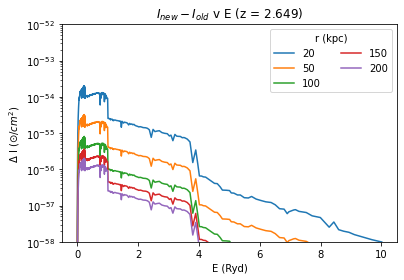

In [14]:
for d in dlis:
    spec = dat[d][2.013]['spec']/(16*np.pi**2*(d*3.086e+21)**2)
    wave = dat[d][2.013]['wave']*u.Angstrom
    nu = wave.to("J", equivalence="spectral") / Ryd
    nu = nu.to_value()
    plt.plot(nu,spec, label = str(d))
    
plt.yscale('log')
# plt.xlim([-0.05e6,1e6])
plt.ylim([10**(-58),10**(-52)])
plt.title("$I_{new} - I_{old}$ v E (z = 2.649)")
plt.ylabel("$\Delta$ I ($\odot$/$cm^2$)")
plt.xlabel("E (Ryd)")
plt.legend(title = "r (kpc)", ncol = 2)

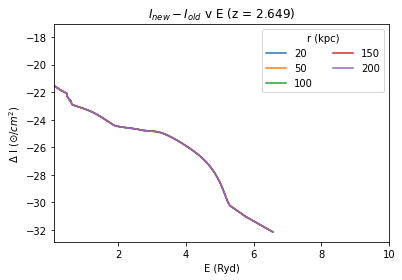

In [21]:
for d in dlis:
    spec = dat[d][2.013]['rebin_spec']
    wave = ptw_wave*u.Angstrom
    nu = wave.to("J", equivalence="spectral") / Ryd
    nu = nu.to_value()
    plt.plot(np.log10(nu),spec, label = str(d))
    
# plt.yscale('log')
plt.xlim([0.1,10])
# plt.ylim([10**(-58),10**(-52)])
plt.title("$I_{new} - I_{old}$ v E (z = 2.649)")
plt.ylabel("$\Delta$ I ($\odot$/$cm^2$)")
plt.xlabel("E (Ryd)")
plt.legend(title = "r (kpc)", ncol = 2)

In [12]:
Ryd = 2.1798723611035e-18 * u.J
ptw_wave = ptw_wave * u.Angstrom
nu = ptw_wave.to("J", equivalence="spectral") / Ryd
print(np.max(nu))

3672982.550650771 dimensionless


In [ ]:
dlist = [20,50,100,150,200]

for d in dlist:
    d_m = d
    print(np.max(np.log(spec/d_m**2)))

In [ ]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'
ptw_zs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)

ptw_wave = ptw_data[:,3]*u.Angstrom
print(np.max(ptw_wave))

In [ ]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'

ptw_rs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)


rs_range = [1.4,2.7]
rs_mask0 = np.where((ptw_rs>=rs_range[0]) & (ptw_rs<=rs_range[1]))
print(ptw_rs[rs_mask0].shape)
print(ptw_data[:,rs_mask0].shape)

In [ ]:
ptw_rs[rs_mask0][15]

In [ ]:
for irs in range(len(ptw_zs)):
    rs = ptw_zs[irs]
    if (rs < 2) or (rs > 3):
        continue
    print(rs)

In [ ]:
with open("./d_20_kpc_rs.pkl","rb") as f:
    rss = pickle.load(f)
print(*rss, sep=' ')

In [ ]:
np.where((ptw_zs<2))

python gen_cloudy_input_no_gal.py --ds /mnt/scratch/tairaeli/fg_2020_uvb_dat --uvb /mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/fg20_spec_lambda.dat

In [13]:
import numpy as np
import unyt as u
from scipy.interpolate import interp1d
import argparse
import pickle

uvb_file = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/fg20_spec_lambda.dat"
# uvb_file = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/fg20_spec_nu.dat"
rs_range = [1.2,2.7]
ds = "/mnt/scratch/tairaeli/fg_2020_uvb_dat"

# loading in array for desired energy bins
uvb_rs = np.genfromtxt(uvb_file, max_rows = 1)

# creating a mask to isolate desired redshift data
rs_mask = np.where((uvb_rs>=rs_range[0]) & (uvb_rs<=rs_range[1]))

# masking redhsifts with desired analysis range using previously generated mask
uvb_rs = uvb_rs[rs_mask]

In [15]:
uvb_data = np.genfromtxt(uvb_file, skip_header=11)

In [16]:
uvb_data

array([[1.22320738e-02, 4.88896683e-29, 5.33208755e-29, ...,
        3.17778706e-33, 3.06888647e-33, 0.00000000e+00],
       [1.23147229e-02, 4.93819147e-29, 5.38580558e-29, ...,
        3.21049885e-33, 3.10047724e-33, 0.00000000e+00],
       [1.23984965e-02, 4.98826148e-29, 5.44044641e-29, ...,
        3.24377799e-33, 3.13261593e-33, 0.00000000e+00],
       ...,
       [4.55644748e+03, 5.91497609e-21, 6.40935283e-21, ...,
        4.28825932e-27, 4.14130360e-27, 0.00000000e+00],
       [6.07526331e+03, 7.29358516e-21, 7.94807585e-21, ...,
        5.11085630e-27, 4.93571073e-27, 0.00000000e+00],
       [9.11289496e+03, 9.75158590e-21, 1.05146141e-20, ...,
        6.54499529e-27, 6.32070275e-27, 0.00000000e+00]])